<a href="https://colab.research.google.com/github/Yashrjadhav/DL/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0992  
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9273 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8008 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4283 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1907 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8264 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5686 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6341 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3838 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2733 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2140 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1661 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9897 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9523 
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

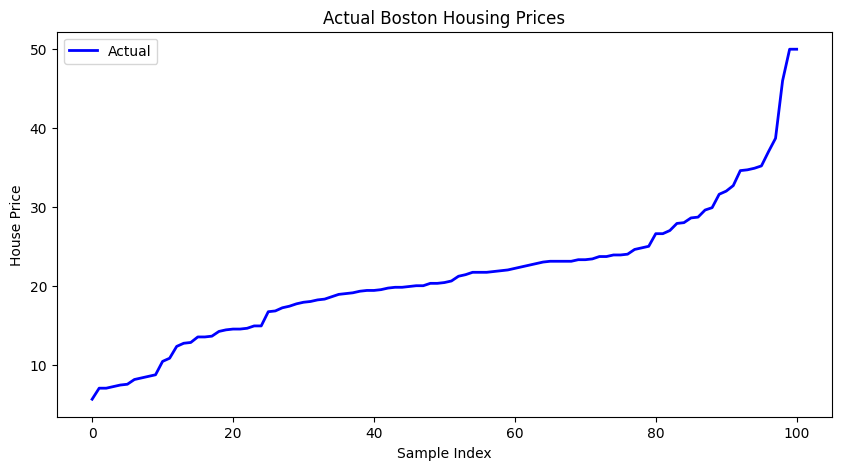

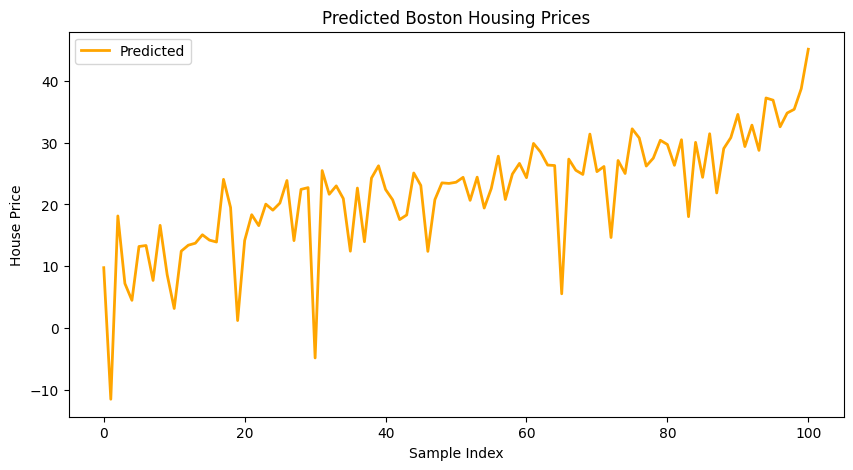

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# 1) Load and clean data
df = pd.read_csv('/content/BostonHousing.csv')

# Coerce non-numeric → NaN, then drop all NaNs or infinities
df = df.apply(pd.to_numeric, errors='coerce')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# 2) Separate features & target (lower-case 'medv')
X = df.drop('medv', axis=1).values
y = df['medv'].values    # shape (n,)

# 3) Train/test split (keep y_test unscaled for metrics/plots)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Scale features
scaler_X = StandardScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s  = scaler_X.transform(X_test)

# 5) Scale y_train only
scaler_y = StandardScaler()
y_train_s = scaler_y.fit_transform(y_train.reshape(-1,1))

# 6) Build & train the DNN (1 neuron = linear regression)
model = Sequential([
    Input(shape=(X_train_s.shape[1],)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_s, y_train_s, epochs=100, verbose=1)

# 7) Predict & inverse-transform back to original scale
y_pred_s = model.predict(X_test_s)
y_pred = scaler_y.inverse_transform(y_pred_s).flatten()

# 8) Print metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}  MAE: {mae:.2f}  R²: {r2:.3f}")

# 9) Sort for smooth line plots
idx = np.argsort(y_test)
y_true_sorted = y_test[idx]
y_pred_sorted = y_pred[idx]

# 10) Plot Actual Prices
plt.figure(figsize=(10, 5))
plt.plot(y_true_sorted, label='Actual', color='blue', linewidth=2)
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.title("Actual Boston Housing Prices")
plt.legend()
plt.show()

# 11) Plot Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_pred_sorted, label='Predicted', color='orange', linewidth=2)
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.title("Predicted Boston Housing Prices")
plt.legend()
plt.show()
